1.365703635028376
1.6960491495864916
1.754506252106381
1.858496207701043
1.6702528460138661


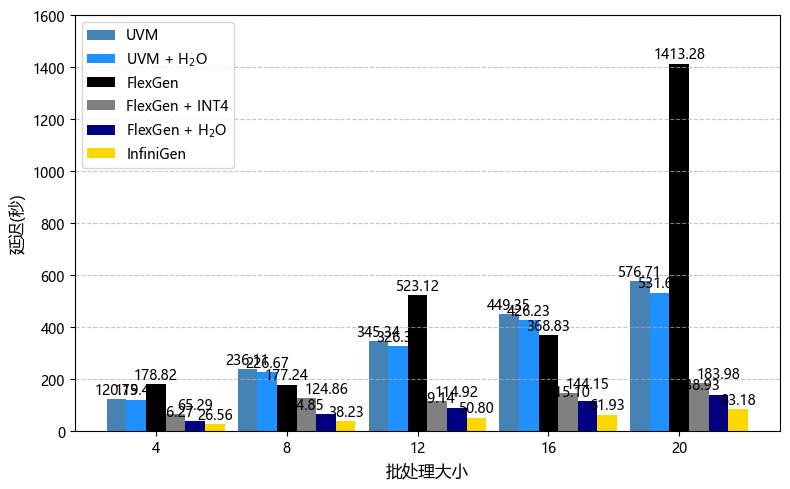

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体为微软雅黑
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体
rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块
# 定义函数以从文件中提取数据
def extract_data_from_log(file_path):
    data = {
        "UVM": [],
        "UVM + H2O": [],
        "FlexGen": [],
        "FlexGen + INT4": [],
        "FlexGen + H2O": [],
        "InfiniGen (Ours)": []
    }
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if 'Total' in lines[i]:
                # 提取标签
                current_key = lines[i - 3].strip()
                # 提取数值
                total = float(lines[i].split(":")[1].split()[0])  # 只提取 Total 的数值部分
                data[current_key].append(total)

    return data

# 读取日志文件内容
log_file_path = "log"  # 替换为您的日志文件路径

# 提取数据
data = extract_data_from_log(log_file_path)

# 数据
batch_sizes = [4, 8, 12, 16, 20]
latency_uvm = data["UVM"]
latency_uvm_h2o = data["UVM + H2O"]
latency_flexgen = data["FlexGen"]
latency_flexgen_int4 = data["FlexGen + INT4"]
latency_flexgen_h2o = data["FlexGen + H2O"]
latency_infinigen = data["InfiniGen (Ours)"]

# 柱状图宽度
bar_width = 0.15

# 每组柱状图的位置
x = np.arange(len(batch_sizes))

# 创建图表
fig = plt.figure(figsize=(8,5))

# 绘制柱状图
plt.bar(x - 2*bar_width, latency_uvm, bar_width, label='UVM', color='steelblue')
plt.bar(x - bar_width, latency_uvm_h2o, bar_width, label='UVM + H$_2$O', color='dodgerblue')
plt.bar(x, latency_flexgen, bar_width, label='FlexGen', color='black')
plt.bar(x + bar_width, latency_flexgen_int4, bar_width, label='FlexGen + INT4', color='grey')
plt.bar(x + 2*bar_width, latency_flexgen_h2o, bar_width, label='FlexGen + H$_2$O', color='navy')
plt.bar(x + 3*bar_width, latency_infinigen, bar_width, label='InfiniGen', color='gold')

# 添加标签和图例
plt.xlabel('批处理大小', fontsize=12)
plt.ylabel('延迟(秒)', fontsize=12)
# plt.title('Inference Latency for 5 Different Batch Sizes on OPT-13B', fontsize=14)
plt.xticks(x, batch_sizes)
plt.ylim(0, 1600)
plt.legend()

# 添加标注
for i in range(len(batch_sizes)):
    print(latency_flexgen_h2o[i]/latency_infinigen[i])
    plt.text(x[i] - 2*bar_width, latency_uvm[i] + 20, f'{latency_uvm[i]:.2f}', ha='center', fontsize=10)
    plt.text(x[i] - bar_width, latency_uvm_h2o[i] + 20, f'{latency_uvm_h2o[i]:.2f}', ha='center', fontsize=10)
    plt.text(x[i], latency_flexgen[i] + 20, f'{latency_flexgen[i]:.2f}', ha='center', fontsize=10)
    plt.text(x[i] + 2*bar_width, latency_flexgen_int4[i] + 20, f'{latency_flexgen_int4[i]:.2f}', ha='center', fontsize=10)
    plt.text(x[i] + bar_width, latency_flexgen_h2o[i] + 20, f'{latency_flexgen_h2o[i]:.2f}', ha='center', fontsize=10)
    plt.text(x[i] + 3*bar_width, latency_infinigen[i] + 20, f'{latency_infinigen[i]:.2f}', ha='center', fontsize=10)

# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 调整布局并显示
plt.tight_layout()
plt.show()
fig.savefig('15.pdf')  # 保存为PNG格式